# Kaggle Learn Courses: Pandas & Data Cleaning

This notebook uses the IEA monthly electricty statistics dataset for practicing concepts seen in the Pandas and Data Cleaning courses from the Kaggle platform. The pre-processing of this dataset will be useful as well for the project in the Kaggle-X program cohort 3.

In [19]:
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

# helpful character encoding module
import charset_normalizer

# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

# set seed for reproducibility
np.random.seed(0)

c:\workspace\Kaggle-X\.venv\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Pandas

### Lesson 1.Creating, Reading and Writing

In [2]:
#reading the dataset
iea_df = pd.read_csv('C:\workspace\Kaggle-X\datasets\iea-monthly-electricity-statistics.csv')

#checking its shape
iea_df.shape

(181915, 12)

In [3]:
#Checking the first 5 rows of content
iea_df.head()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,NaN,0.930108


### Lesson 2.Indexing, Selecting & Assigning

**Native accessors**

In [23]:
iea_df.COUNTRY

0             Australia
1             Australia
2             Australia
3             Australia
4             Australia
              ...      
181910    United States
181911    United States
181912    United States
181913    United States
181914    United States
Name: COUNTRY, Length: 181915, dtype: object

In [25]:
iea_df['COUNTRY']

0             Australia
1             Australia
2             Australia
3             Australia
4             Australia
              ...      
181910    United States
181911    United States
181912    United States
181913    United States
181914    United States
Name: COUNTRY, Length: 181915, dtype: object

In [26]:
iea_df['COUNTRY'][0]

'Australia'

**Indexing in Pandas**

Pandas indexing works in one of two paradigms. The first is index-based selection: selecting data based on its numerical position in the data. iloc follows this paradigm.

To select the first row of data in a DataFrame, we may use the following:

In [27]:
iea_df.iloc[0]

COUNTRY                  Australia
CODE_TIME                  JAN2010
TIME                  January 2010
YEAR                          2010
MONTH                            1
MONTH_NAME                 January
PRODUCT                      Hydro
VALUE                      990.728
DISPLAY_ORDER                    1
yearToDate               16471.891
previousYearToDate             NaN
share                     0.047771
Name: 0, dtype: object

Both loc and iloc are row-first, column-second. This is the opposite of what we do in native Python, which is column-first, row-second.

This means that it's marginally easier to retrieve rows, and marginally harder to get retrieve columns. To get a column with iloc, we can do the following:

In [28]:
iea_df.iloc[:, 0]

0             Australia
1             Australia
2             Australia
3             Australia
4             Australia
              ...      
181910    United States
181911    United States
181912    United States
181913    United States
181914    United States
Name: COUNTRY, Length: 181915, dtype: object

 For example, to select the country column from just the first, second, and third row, we would do:

In [30]:
iea_df.iloc[:3, 0]

0    Australia
1    Australia
2    Australia
Name: COUNTRY, dtype: object

It's also possible to pass a list:

In [31]:
iea_df.iloc[[0, 1, 2], 0]

0    Australia
1    Australia
2    Australia
Name: COUNTRY, dtype: object

Finally, it's worth knowing that negative numbers can be used in selection. This will start counting forwards from the end of the values. So for example here are the last five elements of the dataset.

In [32]:
iea_df.iloc[-5:]

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
181910,United States,DEC2022,December 2022,2022,12,December,Non-renewables,292417.548132,23,3.355042e+06,3.320634e+06,0.791164
181911,United States,DEC2022,December 2022,2022,12,December,Others,8017.840957,24,5.393606e+04,4.899452e+04,0.021693
181912,United States,DEC2022,December 2022,2022,12,December,Other renewables aggregated,6133.265943,25,7.100997e+04,7.242158e+04,0.016594
181913,United States,DEC2022,December 2022,2022,12,December,Low carbon,146425.474534,26,1.749805e+06,1.670531e+06,0.396168
181914,United States,DEC2022,December 2022,2022,12,December,Fossil fuels,223357.219650,27,2.583925e+06,2.542138e+06,0.604315


**Label-based selection**

The second paradigm for attribute selection is the one followed by the loc operator: label-based selection. In this paradigm, it's the data index value, not its position, which matters.

For example, to get the first entry in reviews, we would now do the following:

In [34]:
iea_df.loc[0, 'COUNTRY']

'Australia'

iloc is conceptually simpler than loc because it ignores the dataset's indices. When we use iloc we treat the dataset like a big matrix (a list of lists), one that we have to index into by position. loc, by contrast, uses the information in the indices to do its work. Since your dataset usually has meaningful indices, it's usually easier to do things using loc instead. For example, here's one operation that's much easier using loc:

In [35]:
iea_df.loc[:, ['COUNTRY', 'TIME', 'PRODUCT']]

,COUNTRY,TIME,PRODUCT
0,Australia,January 2010,Hydro
1,Australia,January 2010,Wind
2,Australia,January 2010,Solar
3,Australia,January 2010,Geothermal
4,Australia,January 2010,Total combustible fuels
...,...,...,...
181910,United States,December 2022,Non-renewables
181911,United States,December 2022,Others
181912,United States,December 2022,Other renewables aggregated
181913,United States,December 2022,Low carbon


* iloc uses the Python stdlib indexing scheme, where the first element of the range is included and the last one excluded.

* loc, meanwhile, indexes inclusively. 

**Manipulating the index**

The set_index() method can be used to do the job. Here is what happens when we set_index to the DISPLAY ORDER field:

In [37]:
iea_df.set_index("DISPLAY_ORDER")

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,yearToDate,previousYearToDate,share
DISPLAY_ORDER,,,,,,,,,,,
1,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728000,1.647189e+04,NaN,0.047771
2,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469000,4.940909e+03,NaN,0.019744
3,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216000,9.082380e+02,NaN,0.002373
4,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083000,9.960000e-01,NaN,0.000004
7,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730000,2.143030e+05,NaN,0.930108
...,...,...,...,...,...,...,...,...,...,...,...
23,United States,DEC2022,December 2022,2022,12,December,Non-renewables,292417.548132,3.355042e+06,3.320634e+06,0.791164
24,United States,DEC2022,December 2022,2022,12,December,Others,8017.840957,5.393606e+04,4.899452e+04,0.021693
25,United States,DEC2022,December 2022,2022,12,December,Other renewables aggregated,6133.265943,7.100997e+04,7.242158e+04,0.016594


**Conditional selection**



In [39]:
iea_df.COUNTRY == 'Colombia'

0         False
1         False
2         False
3         False
4         False
          ...  
181910    False
181911    False
181912    False
181913    False
181914    False
Name: COUNTRY, Length: 181915, dtype: bool

In [40]:
iea_df.loc[iea_df.COUNTRY == 'Colombia']

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
46557,Colombia,JAN2014,January 2014,2014,1,January,Hydro,3903.977000,1,47249.092000,NaN,0.684582
46558,Colombia,JAN2014,January 2014,2014,1,January,Wind,5.648000,2,69.482000,NaN,0.000990
46559,Colombia,JAN2014,January 2014,2014,1,January,Solar,1.065000,3,8.947000,NaN,0.000187
46560,Colombia,JAN2014,January 2014,2014,1,January,Total combustible fuels,1792.024000,7,21699.775000,NaN,0.314241
46561,Colombia,JAN2014,January 2014,2014,1,January,Coal,521.938000,8,5152.090000,NaN,0.091524
...,...,...,...,...,...,...,...,...,...,...,...,...
180949,Colombia,DEC2022,December 2022,2022,12,December,Non-renewables,1538.170701,23,19520.445158,20404.920447,0.226603
180950,Colombia,DEC2022,December 2022,2022,12,December,Others,224.526296,24,2736.625294,2540.518687,0.033077
180951,Colombia,DEC2022,December 2022,2022,12,December,Other renewables aggregated,181.499851,25,2178.014545,2082.235059,0.026738
180952,Colombia,DEC2022,December 2022,2022,12,December,Low carbon,5249.797902,26,65484.517485,60649.185588,0.773397


We can use the ampersand (&) to bring two questions together:

In [43]:
iea_df.loc[(iea_df.COUNTRY == 'Colombia') & (iea_df.PRODUCT == 'Hydro')]

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
46557,Colombia,JAN2014,January 2014,2014,1,January,Hydro,3903.977000,1,47249.092000,NaN,0.684582
47548,Colombia,FEB2014,February 2014,2014,2,February,Hydro,3598.260000,1,47249.092000,NaN,0.670709
48539,Colombia,MAR2014,March 2014,2014,3,March,Hydro,4205.913000,1,47249.092000,NaN,0.721115
49530,Colombia,APR2014,April 2014,2014,4,April,Hydro,3615.005000,1,47249.092000,NaN,0.651012
50521,Colombia,MAY2014,May 2014,2014,5,May,Hydro,3632.958000,1,47249.092000,NaN,0.633757
...,...,...,...,...,...,...,...,...,...,...,...,...
176327,Colombia,AUG2022,August 2022,2022,8,August,Hydro,5563.837944,1,62762.476129,38107.090216,0.760097
177482,Colombia,SEP2022,September 2022,2022,9,September,Hydro,5372.064919,1,62762.476129,43470.312939,0.753873
178636,Colombia,OCT2022,October 2022,2022,10,October,Hydro,5713.186589,1,62762.476129,48913.393220,0.779774
179790,Colombia,NOV2022,November 2022,2022,11,November,Hydro,5528.747085,1,62762.476129,54110.639488,0.773385


*OR* For this we use a pipe (|):

In [44]:
iea_df.loc[(iea_df.COUNTRY == 'Colombia') | (iea_df.PRODUCT == 'Hydro')]

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728000,1,16471.891000,NaN,0.047771
20,Austria,JAN2010,January 2010,2010,1,January,Hydro,2579.264000,1,39502.566000,NaN,0.437055
45,Belgium,JAN2010,January 2010,2010,1,January,Hydro,147.410000,1,1645.999000,NaN,0.017674
70,Canada,JAN2010,January 2010,2010,1,January,Hydro,37885.199000,1,347981.000000,NaN,0.627949
96,Chile,JAN2010,January 2010,2010,1,January,Hydro,2277.808000,1,21641.001000,NaN,0.476488
...,...,...,...,...,...,...,...,...,...,...,...,...
181791,Spain,DEC2022,December 2022,2022,12,December,Hydro,3234.899714,1,21641.773490,32367.291525,0.142601
181817,Sweden,DEC2022,December 2022,2022,12,December,Hydro,6819.086588,1,72872.916423,70833.291772,0.436099
181841,Switzerland,DEC2022,December 2022,2022,12,December,Hydro,2672.666922,1,33787.552661,39169.750745,0.505737
181864,United Kingdom,DEC2022,December 2022,2022,12,December,Hydro,790.695499,1,8137.157654,6709.691930,0.028061


Pandas comes with a few built-in conditional selectors, two of which we will highlight here.

The first is isin. isin is lets you select data whose value "is in" a list of values. For example, here's how we can use it to select energy only from Italy or France:

In [46]:
iea_df.loc[iea_df.COUNTRY.isin(['Italy', 'France'])]

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
207,France,JAN2010,January 2010,2010,1,January,Hydro,6210.412000,1,66698.555000,NaN,0.111276
208,France,JAN2010,January 2010,2010,1,January,Wind,705.829000,2,9945.000000,NaN,0.012647
209,France,JAN2010,January 2010,2010,1,January,Solar,13.832000,3,620.001000,NaN,0.000248
210,France,JAN2010,January 2010,2010,1,January,Other renewables,39.167000,5,470.004000,NaN,0.000702
211,France,JAN2010,January 2010,2010,1,January,Nuclear,40313.099000,6,407878.001000,NaN,0.722318
...,...,...,...,...,...,...,...,...,...,...,...,...
181306,Italy,DEC2022,December 2022,2022,12,December,Non-renewables,15562.413696,23,175960.949976,160267.637394,0.686712
181307,Italy,DEC2022,December 2022,2022,12,December,Others,967.220356,24,10964.194153,12768.739165,0.042680
181308,Italy,DEC2022,December 2022,2022,12,December,Other renewables aggregated,2114.781415,25,24511.731043,24301.600387,0.093318
181309,Italy,DEC2022,December 2022,2022,12,December,Low carbon,7142.789829,26,102681.249896,116739.742558,0.315185


The second is isnull (and its companion notnull). These methods let you highlight values which are (or are not) empty (NaN). For example, to filter out PRODUCTS lacking a value tag in the dataset, here's what we would do:

In [47]:
iea_df.loc[iea_df.VALUE.notnull()]

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728000,1,1.647189e+04,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469000,2,4.940909e+03,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216000,3,9.082380e+02,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083000,4,9.960000e-01,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730000,7,2.143030e+05,NaN,0.930108
...,...,...,...,...,...,...,...,...,...,...,...,...
181910,United States,DEC2022,December 2022,2022,12,December,Non-renewables,292417.548132,23,3.355042e+06,3.320634e+06,0.791164
181911,United States,DEC2022,December 2022,2022,12,December,Others,8017.840957,24,5.393606e+04,4.899452e+04,0.021693
181912,United States,DEC2022,December 2022,2022,12,December,Other renewables aggregated,6133.265943,25,7.100997e+04,7.242158e+04,0.016594
181913,United States,DEC2022,December 2022,2022,12,December,Low carbon,146425.474534,26,1.749805e+06,1.670531e+06,0.396168


**Assigning data**

You can assign either a constant value:

In [48]:
iea_df['previousYearToDate'] = 0
iea_df['previousYearToDate']

0         0
1         0
2         0
3         0
4         0
         ..
181910    0
181911    0
181912    0
181913    0
181914    0
Name: previousYearToDate, Length: 181915, dtype: int64

Or with an iterable of values:

In [49]:
iea_df['DISPLAY_ORDER'] = range(len(iea_df), 0, -1)
iea_df['DISPLAY_ORDER']

0         181915
1         181914
2         181913
3         181912
4         181911
           ...  
181910         5
181911         4
181912         3
181913         2
181914         1
Name: DISPLAY_ORDER, Length: 181915, dtype: int64

### Lesson 3: Summary Functions and Maps

Extract insights from your data.

In [50]:
#Example with numerical data
iea_df.VALUE.describe()

count    1.819150e+05
mean     2.091292e+04
std      8.584724e+04
min     -6.852344e+03
25%      6.685189e+01
50%      7.663990e+02
75%      4.989495e+03
max      1.001529e+06
Name: VALUE, dtype: float64

In [51]:
#Example with string data
iea_df.PRODUCT.describe()

count           181915
unique              27
top       Fossil fuels
freq              7332
Name: PRODUCT, dtype: object

In [52]:
#mean value
iea_df.VALUE.mean()

20912.924486249343

List of unique values of a column

In [54]:
iea_df.PRODUCT.unique()

array(['Hydro', 'Wind', 'Solar', 'Geothermal', 'Total combustible fuels',
       'Coal', 'Oil', 'Natural gas', 'Combustible renewables',
       'Net electricity production', 'Electricity supplied',
       'Used for pumped storage', 'Distribution losses',
       'Final consumption', 'Renewables', 'Non-renewables', 'Others',
       'Other renewables aggregated', 'Low carbon', 'Fossil fuels',
       'Other combustible non-renewables', 'Not specified',
       'Total imports', 'Total exports', 'Electricity trade', 'Nuclear',
       'Other renewables'], dtype=object)

To see a list of unique values and how often they occur in the dataset, we can use the value_counts() method:

In [55]:
iea_df.PRODUCT.value_counts()

PRODUCT
Fossil fuels                        7332
Low carbon                          7332
Total combustible fuels             7332
Non-renewables                      7332
Net electricity production          7332
Electricity supplied                7332
Renewables                          7332
Others                              7321
Other renewables aggregated         7319
Oil                                 7241
Hydro                               7238
Distribution losses                 7238
Final consumption                   7212
Combustible renewables              7211
Wind                                7210
Natural gas                         7116
Solar                               7054
Coal                                6778
Electricity trade                   6639
Total imports                       6600
Total exports                       6580
Other combustible non-renewables    6512
Used for pumped storage             6060
Not specified                       5616
Nuclear 

**MAPS**

Creating new representations from existing data, or for transforming data from the format it is in now to the format that we want it to be in later.

There are two mapping methods that you will use often.

map() is the first, and slightly simpler one. For example, suppose that we wanted to remean the values of each energy to 0. We can do this as follows:

In [ ]:
values_mean = iea_df.VALUE.mean()
iea_df.VALUE.map(lambda p: p - values_mean)

apply() is the equivalent method if we want to transform a whole DataFrame by calling a custom method on each row.

In [ ]:
def remean_values(row):
    row.points = row.points - values_mean
    return row

iea_df.apply(remean_values, axis='columns')

Pandas provides many common mapping operations as built-ins. For example, here's a faster way of remeaning our points column

In [ ]:
values_mean = iea_df.VALUE.mean()
iea_df.VALUE - values_mean

In this code we are performing an operation between a lot of values on the left-hand side (everything in the Series) and a single value on the right-hand side (the mean value). Pandas looks at this expression and figures out that we must mean to subtract that mean value from every value in the dataset.

Pandas will also understand what to do if we perform these operations between Series of equal length. For example, an easy way of combining country and region information in the dataset would be to do the following:

In [ ]:
iea_df.MONTH_NAME + " - " + iea_df.YEAR

These operators are faster than map() or apply() because they use speed ups built into pandas. All of the standard Python operators (>, <, ==, and so on) work in this manner.

However, they are not as flexible as map() or apply(), which can do more advanced things, like applying conditional logic, which cannot be done with addition and subtraction alone.



### Lesson 4: Grouping and Sorting
Scale up your level of insight. The more complex the dataset, the more this matters

**Groupwise analysis**
One function we've been using heavily thus far is the value_counts() function. We can replicate what value_counts() does by doing the following:

In [58]:
iea_df.groupby('MONTH').MONTH.count()

MONTH
1     15173
2     15182
3     15162
4     15162
5     15161
6     15158
7     15159
8     15150
9     15157
10    15153
11    15146
12    15152
Name: MONTH, dtype: int64

In [59]:
iea_df.groupby('MONTH').MONTH.min()

MONTH
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
Name: MONTH, dtype: int64

You can think of each group we generate as being a slice of our DataFrame containing only data with values that match. This DataFrame is accessible to us directly using the apply() method, and we can then manipulate the data in any way we see fit. For example, here's one way of selecting the name of the first energy source product from each country in the dataset:

In [62]:
iea_df.groupby('COUNTRY').apply(lambda df: df.PRODUCT.iloc[0])

COUNTRY
Argentina              Hydro
Australia              Hydro
Austria                Hydro
Belgium                Hydro
Brazil                 Hydro
Bulgaria               Hydro
Canada                 Hydro
Chile                  Hydro
Colombia               Hydro
Costa Rica             Hydro
Croatia                Hydro
Cyprus                  Wind
Czech Republic         Hydro
Denmark                Hydro
Estonia                Hydro
Finland                Hydro
France                 Hydro
Germany                Hydro
Greece                 Hydro
Hungary                Hydro
IEA Total              Hydro
Iceland                Hydro
India                  Hydro
Ireland                Hydro
Italy                  Hydro
Japan                  Hydro
Korea                  Hydro
Latvia                 Hydro
Lithuania              Hydro
Luxembourg             Hydro
Malta                  Solar
Mexico                 Hydro
Netherlands            Hydro
New Zealand            Hydro
North 

For even more fine-grained control, you can also group by more than one column. For an example, here's how we would pick out the maximum value by country and type of energy product:

In [63]:
iea_df.groupby(['COUNTRY', 'PRODUCT']).apply(lambda df: df.loc[df.VALUE.idxmax()])

COUNTRY CODE_TIME          TIME  \
COUNTRY       PRODUCT                                                          
Argentina     Coal                         Argentina   JUL2020     July 2020   
              Combustible renewables       Argentina   JUN2016     June 2016   
              Distribution losses          Argentina   JAN2018  January 2018   
              Electricity supplied         Argentina   JAN2022  January 2022   
              Electricity trade            Argentina   OCT2016  October 2016   
...                                              ...       ...           ...   
United States Total combustible fuels  United States   AUG2010   August 2010   
              Total exports            United States   MAR2019    March 2019   
              Total imports            United States   JUL2016     July 2016   
              Used for pumped storage  United States   AUG2016   August 2016   
              Wind                     United States   APR2022    April 2022   

                                       YEAR  MONTH MONTH_NAME  \
COUNTRY       PRODUCT                                           
Argentina     Coal                     2020      7       July   
              Combustible renewables   2016      6       June   
              Distribution losses      2018      1    January   
              Electricity supplied     2022      1    January   
              Electricity trade        2016     10    October   
...                                     ...    ...        ...   
United States Total combustible fuels  2010      8     August   
              Total exports            2019      3      March   
              Total imports            2016      7       July   
              Used for pumped storage  2016      8     August   
              Wind                     2022      4      April   

                                                       PRODUCT          VALUE  \
COUNTRY       PRODUCT                                                           
Argentina     Coal                                        Coal     430.851317   
              Combustible renewables    Combustible renewables     577.089000   
              Distribution losses          Distribution losses       0.000000   
              Electricity supplied        Electricity supplied   14018.947955   
              Electricity trade              Electricity trade      12.708000   
...                                                        ...            ...   
United States Total combustible fuels  Total combustible fuels  309509.400000   
              Total exports                      Total exports    4830.143865   
              Total imports                      Total imports    7302.828000   
              Used for pumped storage  Used for pumped storage    3678.267000   
              Wind                                        Wind   46297.967563   

                                       DISPLAY_ORDER    yearToDate  \
COUNTRY       PRODUCT                                                
Argentina     Coal                             38890  1.854850e+03   
              Combustible renewables          103061  1.139279e+03   
              Distribution losses              80189  0.000000e+00   
              Electricity supplied             13871  1.399550e+05   
              Electricity trade                98245 -8.187430e+02   
...                                              ...           ...   
United States Total combustible fuels         174214  2.950567e+06   
              Total exports                    59564  4.576190e+04   
              Total imports                   100677  7.271600e+04   
              Used for pumped storage          99473  2.912900e+04   
              Wind                              9248  4.369564e+05   

                                       previousYearToDate     share  
COUNTRY       PRODUCT                                                
Argentina     Coal                                   

Another groupby() method worth mentioning is agg(), which lets you run a bunch of different functions on your DataFrame simultaneously. For example, we can generate a simple statistical summary of the dataset as follows:



In [64]:
iea_df.groupby(['COUNTRY']).VALUE.agg([len, min, max])

C:\Users\Andrea FS\AppData\Local\Temp\ipykernel_19540\3482707245.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'min' instead.
  iea_df.groupby(['COUNTRY']).VALUE.agg([len, min, max])
C:\Users\Andrea FS\AppData\Local\Temp\ipykernel_19540\3482707245.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'max' instead.
  iea_df.groupby(['COUNTRY']).VALUE.agg([len, min, max])


,len,min,max
COUNTRY,,,
Argentina,2399,-236.765000,1.401895e+04
Australia,3446,0.000000,2.411037e+04
Austria,3996,-2066.127000,7.224298e+03
Belgium,3996,-2257.514000,9.130187e+03
Brazil,2340,-711.723000,5.642134e+04
Bulgaria,2436,-111.121554,4.694226e+03
Canada,4080,0.000000,6.568449e+04
Chile,3347,-140.707000,7.608038e+03
Colombia,2548,-224.307384,7.328362e+03


**Multi-indexes**

Depending on the operation we run, it will sometimes result in what is called a multi-index.

A multi-index differs from a regular index in that it has multiple levels. For example:

In [65]:
countries = iea_df.groupby(['COUNTRY', 'PRODUCT']).VALUE.agg([len])
countries

len
COUNTRY       PRODUCT                     
Argentina     Coal                      94
              Combustible renewables    96
              Distribution losses       84
              Electricity supplied      96
              Electricity trade         84
...                                    ...
United States Total combustible fuels  156
              Total exports            156
              Total imports            156
              Used for pumped storage  156
              Wind                     156

[1397 rows x 1 columns]

In [67]:
mi = countries.index
type(mi)

pandas.core.indexes.multi.MultiIndex

However, in general the multi-index method you will use most often is the one for converting back to a regular index, the reset_index() method:

In [68]:
countries.reset_index()

,COUNTRY,PRODUCT,len
0,Argentina,Coal,94
1,Argentina,Combustible renewables,96
2,Argentina,Distribution losses,84
3,Argentina,Electricity supplied,96
4,Argentina,Electricity trade,84
...,...,...,...
1392,United States,Total combustible fuels,156
1393,United States,Total exports,156
1394,United States,Total imports,156
1395,United States,Used for pumped storage,156


**Sorting**

To get data in the order want it in we can sort it ourselves. The sort_values() method is handy for this.

In [69]:
countries = countries.reset_index()
countries.sort_values(by='len')

,COUNTRY,PRODUCT,len
261,Costa Rica,Total imports,8
251,Costa Rica,Low carbon,24
254,Costa Rica,Oil,24
250,Costa Rica,Hydro,24
249,Costa Rica,Geothermal,24
...,...,...,...
634,Ireland,Renewables,156
635,Ireland,Solar,156
636,Ireland,Total combustible fuels,156
638,Ireland,Total imports,156


sort_values() defaults to an ascending sort, where the lowest values go first. However, most of the time we want a descending sort, where the higher numbers go first. That goes thusly:

In [70]:
countries.sort_values(by='len', ascending=False)

,COUNTRY,PRODUCT,len
698,Korea,Electricity supplied,156
1021,OECD Europe,Distribution losses,156
884,New Zealand,Coal,156
883,Netherlands,Wind,156
881,Netherlands,Total imports,156
...,...,...,...
254,Costa Rica,Oil,24
255,Costa Rica,Other renewables aggregated,24
256,Costa Rica,Others,24
251,Costa Rica,Low carbon,24


To sort by index values, use the companion method sort_index(). This method has the same arguments and default order:



In [71]:
countries.sort_index()

,COUNTRY,PRODUCT,len
0,Argentina,Coal,94
1,Argentina,Combustible renewables,96
2,Argentina,Distribution losses,84
3,Argentina,Electricity supplied,96
4,Argentina,Electricity trade,84
...,...,...,...
1392,United States,Total combustible fuels,156
1393,United States,Total exports,156
1394,United States,Total imports,156
1395,United States,Used for pumped storage,156


Finally, know that you can sort by more than one column at a time:

In [73]:
countries.sort_values(by=['COUNTRY', 'len'])

,COUNTRY,PRODUCT,len
13,Argentina,Not specified,48
17,Argentina,Other renewables,60
23,Argentina,Total exports,73
2,Argentina,Distribution losses,84
4,Argentina,Electricity trade,84
...,...,...,...
1392,United States,Total combustible fuels,156
1393,United States,Total exports,156
1394,United States,Total imports,156
1395,United States,Used for pumped storage,156


### Lesson 5: Data Types and Missing Values
Deal with the most common progress-blocking problems

**Dtypes**
The data type for a column in a DataFrame or a Series is known as the dtype.

You can use the dtype property to grab the type of a specific column. 

In [74]:
iea_df.VALUE.dtype

dtype('float64')

Alternatively, the dtypes property returns the dtype of every column in the DataFrame:

In [75]:
iea_df.dtypes

COUNTRY                object
CODE_TIME              object
TIME                   object
YEAR                    int64
MONTH                   int64
MONTH_NAME             object
PRODUCT                object
VALUE                 float64
DISPLAY_ORDER           int64
yearToDate            float64
previousYearToDate      int64
share                 float64
dtype: object

One peculiarity to keep in mind (and on display very clearly here) is that columns consisting entirely of strings do not get their own type; they are instead given the object type.

It's possible to convert a column of one type into another wherever such a conversion makes sense by using the astype() function. For example, we may transform the DISPLAY_ORDER column from its existing int64 data type into a float64 data type:

In [76]:
iea_df.DISPLAY_ORDER.astype('float64')

0         181915.0
1         181914.0
2         181913.0
3         181912.0
4         181911.0
            ...   
181910         5.0
181911         4.0
181912         3.0
181913         2.0
181914         1.0
Name: DISPLAY_ORDER, Length: 181915, dtype: float64

A DataFrame or Series index has its own dtype, too:

In [77]:
iea_df.index.dtype

dtype('int64')

**Missing data**

Entries missing values are given the value NaN, short for "Not a Number". For technical reasons these NaN values are always of the float64 dtype.

Pandas provides some methods specific to missing data. To select NaN entries you can use pd.isnull() (or its companion pd.notnull()). This is meant to be used thusly:

In [82]:
iea_df[pd.isnull(iea_df.previousYearToDate)]

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share


Replacing missing values is a common operation. Pandas provides a really handy method for this problem: fillna(). fillna() provides a few different strategies for mitigating such data. For example, we can simply replace each NaN with an "Unknown":

In [83]:
iea_df.previousYearToDate.fillna("Unknown")

0         0
1         0
2         0
3         0
4         0
         ..
181910    0
181911    0
181912    0
181913    0
181914    0
Name: previousYearToDate, Length: 181915, dtype: int64

Or we could fill each missing value with the first non-null value that appears sometime after the given record in the database. This is known as the backfill strategy.

Alternatively, we may have a non-null value that we would like to replace. For example, suppose that since this dataset was published, product solar has changed its name from Solar to Photovoltaic. One way to reflect this in the dataset is using the replace() method:

In [84]:
iea_df.PRODUCT.replace("Solar", "Photovoltaic")

0                               Hydro
1                                Wind
2                        Photovoltaic
3                          Geothermal
4             Total combustible fuels
                     ...             
181910                 Non-renewables
181911                         Others
181912    Other renewables aggregated
181913                     Low carbon
181914                   Fossil fuels
Name: PRODUCT, Length: 181915, dtype: object

The replace() method is worth mentioning here because it's handy for replacing missing data which is given some kind of sentinel value in the dataset: things like "Unknown", "Undisclosed", "Invalid", and so on.

### Lesson 6: Renaming and Combining
Data comes in from many sources. Help it all make sense together

**Renaming**

The first function we'll introduce here is rename(), which lets you change index names and/or column names. For example, to change the VALUES column in our dataset to ENERGY_VALUES, we would do:

In [85]:
iea_df.rename(columns={'VALUE':'ENERGY_VALUE'})

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,ENERGY_VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728000,181915,1.647189e+04,0,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469000,181914,4.940909e+03,0,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216000,181913,9.082380e+02,0,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083000,181912,9.960000e-01,0,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730000,181911,2.143030e+05,0,0.930108
...,...,...,...,...,...,...,...,...,...,...,...,...
181910,United States,DEC2022,December 2022,2022,12,December,Non-renewables,292417.548132,5,3.355042e+06,0,0.791164
181911,United States,DEC2022,December 2022,2022,12,December,Others,8017.840957,4,5.393606e+04,0,0.021693
181912,United States,DEC2022,December 2022,2022,12,December,Other renewables aggregated,6133.265943,3,7.100997e+04,0,0.016594
181913,United States,DEC2022,December 2022,2022,12,December,Low carbon,146425.474534,2,1.749805e+06,0,0.396168


rename() lets you rename index or column values by specifying a index or column keyword parameter, respectively. It supports a variety of input formats, but usually a Python dictionary is the most convenient. Here is an example using it to rename some elements of the index.

In [86]:
iea_df.rename(index={0: 'firstEntry', 1: 'secondEntry'})

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
firstEntry,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728000,181915,1.647189e+04,0,0.047771
secondEntry,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469000,181914,4.940909e+03,0,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216000,181913,9.082380e+02,0,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083000,181912,9.960000e-01,0,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730000,181911,2.143030e+05,0,0.930108
...,...,...,...,...,...,...,...,...,...,...,...,...
181910,United States,DEC2022,December 2022,2022,12,December,Non-renewables,292417.548132,5,3.355042e+06,0,0.791164
181911,United States,DEC2022,December 2022,2022,12,December,Others,8017.840957,4,5.393606e+04,0,0.021693
181912,United States,DEC2022,December 2022,2022,12,December,Other renewables aggregated,6133.265943,3,7.100997e+04,0,0.016594
181913,United States,DEC2022,December 2022,2022,12,December,Low carbon,146425.474534,2,1.749805e+06,0,0.396168


Both the row index and the column index can have their own name attribute. The complimentary rename_axis() method may be used to change these names. For example:

In [87]:
iea_df.rename_axis("sample", axis='rows').rename_axis("fields", axis='columns')

fields,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
sample,,,,,,,,,,,,
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728000,181915,1.647189e+04,0,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469000,181914,4.940909e+03,0,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216000,181913,9.082380e+02,0,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083000,181912,9.960000e-01,0,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730000,181911,2.143030e+05,0,0.930108
...,...,...,...,...,...,...,...,...,...,...,...,...
181910,United States,DEC2022,December 2022,2022,12,December,Non-renewables,292417.548132,5,3.355042e+06,0,0.791164
181911,United States,DEC2022,December 2022,2022,12,December,Others,8017.840957,4,5.393606e+04,0,0.021693
181912,United States,DEC2022,December 2022,2022,12,December,Other renewables aggregated,6133.265943,3,7.100997e+04,0,0.016594


**Combining**

combine different DataFrames and/or Series in non-trivial ways.

Concat()

The simplest combining method is concat(). Given a list of elements, this function will smush those elements together along an axis.

This is useful when we have data in different DataFrame or Series objects but having the same fields (columns). 

In [ ]:
#For example:

#canadian_youtube = pd.read_csv("../input/youtube-new/CAvideos.csv")
#british_youtube = pd.read_csv("../input/youtube-new/GBvideos.csv")

#pd.concat([canadian_youtube, british_youtube])

join() 

lets you combine different DataFrame objects which have an index in common.

In [ ]:
#left = canadian_youtube.set_index(['title', 'trending_date'])
#right = british_youtube.set_index(['title', 'trending_date'])

#left.join(right, lsuffix='_CAN', rsuffix='_UK')

The lsuffix and rsuffix parameters are necessary here because the data has the same column names in both British and Canadian datasets. If this wasn't true (because, say, we'd renamed them beforehand) we wouldn't need them.

## Data Cleaning

### Lesson 1. Handling missing values

In [5]:
missing_values_count = iea_df.isnull().sum()
missing_values_count

COUNTRY                   0
CODE_TIME                 0
TIME                      0
YEAR                      0
MONTH                     0
MONTH_NAME                0
PRODUCT                   0
VALUE                     0
DISPLAY_ORDER             0
yearToDate                0
previousYearToDate    17105
share                     0
dtype: int64

In [6]:
# how many total missing values do we have?
total_cells = np.product(iea_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.7835619199442965


#### **Figure out why the data is missing**

Is this value missing because it wasn't recorded or because it doesn't exist?

If a value is missing becuase it doesn't exist (like the height of the oldest child of someone who doesn't have any children) then it doesn't make sense to try and guess what it might be. These values you probably do want to keep as NaN. On the other hand, if a value is missing because it wasn't recorded, then you can try to guess what it might have been based on the other values in that column and row. This is called imputation


**In this case** its probably because it doesn't exists since the previous year to 2010 was not recorded in this dataset.

#### **Drop missing values**

In [7]:
# remove all the rows that contain a missing value
iea_df.dropna()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
11583,Australia,JAN2011,January 2011,2011,1,January,Hydro,1171.131000,1,1.399798e+04,9.907280e+02,0.049876
11584,Australia,JAN2011,January 2011,2011,1,January,Wind,433.348000,2,6.787749e+03,4.094690e+02,0.018455
11585,Australia,JAN2011,January 2011,2011,1,January,Solar,176.116000,3,1.875002e+03,4.921600e+01,0.007500
11586,Australia,JAN2011,January 2011,2011,1,January,Geothermal,0.083000,4,9.960000e-01,8.300000e-02,0.000004
11587,Australia,JAN2011,January 2011,2011,1,January,Total combustible fuels,21700.353000,7,2.163222e+05,1.928973e+04,0.924165
...,...,...,...,...,...,...,...,...,...,...,...,...
181910,United States,DEC2022,December 2022,2022,12,December,Non-renewables,292417.548132,23,3.355042e+06,3.320634e+06,0.791164
181911,United States,DEC2022,December 2022,2022,12,December,Others,8017.840957,24,5.393606e+04,4.899452e+04,0.021693
181912,United States,DEC2022,December 2022,2022,12,December,Other renewables aggregated,6133.265943,25,7.100997e+04,7.242158e+04,0.016594
181913,United States,DEC2022,December 2022,2022,12,December,Low carbon,146425.474534,26,1.749805e+06,1.670531e+06,0.396168


In [9]:
# remove all columns with at least one missing value
columns_with_na_dropped = iea_df.dropna(axis=1)
columns_with_na_dropped.head()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,0.930108


In [10]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % iea_df.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 12 

Columns with na's dropped: 11


**Filling in missing values automatically**

In [13]:
# get a small subset of the dataset
subset_iea_data = iea_df.loc[:, 'previousYearToDate':'share'].head()
subset_iea_data

,previousYearToDate,share
0,NaN,0.047771
1,NaN,0.019744
2,NaN,0.002373
3,NaN,0.000004
4,NaN,0.930108


We can use the Panda's fillna() function to fill in missing values in a dataframe for us. One option we have is to specify what we want the NaN values to be replaced with. Here, I'm saying that I would like to replace all the NaN values with 0.

In [14]:
# replace all NA's with 0
subset_iea_data.fillna(0)

,previousYearToDate,share
0,0.0,0.047771
1,0.0,0.019744
2,0.0,0.002373
3,0.0,0.000004
4,0.0,0.930108


I could also be a bit more savvy and replace missing values with whatever value comes directly after it in the same column. (This makes a lot of sense for datasets where the observations have some sort of logical order to them.)

In [15]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the remaining na's with 0
subset_iea_data.fillna(method='bfill', axis=0).fillna(0)

C:\Users\Andrea FS\AppData\Local\Temp\ipykernel_20304\4056980848.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset_iea_data.fillna(method='bfill', axis=0).fillna(0)


,previousYearToDate,share
0,0.0,0.047771
1,0.0,0.019744
2,0.0,0.002373
3,0.0,0.000004
4,0.0,0.930108


### Lesson 2: Scaling and Normalization

* Scaling just changes the range of your data. 
* Normalization changes your observations so that they can be described as a normal distribution.

#### Scaling

You want to scale data when you're using methods based on measures of how far apart data points are, **like support vector machines (SVM) or k-nearest neighbors (KNN)**. With these algorithms, a change of "1" in any numeric feature is given the same importance.

For Example: With currency, you can convert between currencies so the algorithm doesn't take the same value for 1 dollar and 1 Yen.

**It helps to** compare different variables on equal footing

In [5]:
# select the VALUE column
original_VALUE_data = pd.DataFrame(iea_df.VALUE)
original_VALUE_data

,VALUE
0,990.728000
1,409.469000
2,49.216000
3,0.083000
4,19289.730000
...,...
181910,292417.548132
181911,8017.840957
181912,6133.265943
181913,146425.474534


In [7]:
scaled_VALUE_data = minmax_scaling(original_VALUE_data, columns=['VALUE'])
scaled_VALUE_data

,VALUE
0,0.007778
1,0.007201
2,0.006844
3,0.006795
4,0.025925
...,...
181910,0.296782
181911,0.014747
181912,0.012878
181913,0.152004


#### Normalization

In [8]:
# get the index of all positive values (Box-Cox only takes positive values)
index_of_positive_values = iea_df.VALUE > 0

# get only positive values (using their indexes)
positive_values = iea_df.VALUE.loc[index_of_positive_values]

# normalize the values (w/ Box-Cox)
normalized_values = pd.Series(stats.boxcox(positive_values)[0], 
                               name='VALUES', index=positive_values.index)

print('Original data\nPreview:\n', positive_values.head())
print('Minimum value:', float(positive_values.min()),
      '\nMaximum value:', float(positive_values.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_values.head())
print('Minimum value:', float(normalized_values.min()),
      '\nMaximum value:', float(normalized_values.max()))

Original data
Preview:
 0      990.728
1      409.469
2       49.216
3        0.083
4    19289.730
Name: VALUE, dtype: float64
Minimum value: 9e-06 
Maximum value: 1001528.929243
______________________________

Normalized data
Preview:
 0     8.052683
1     6.880590
2     4.248027
3    -2.358182
4    12.340058
Name: VALUES, dtype: float64
Minimum value: -9.107985642377473 
Maximum value: 18.979503762033644


c:\workspace\Kaggle-X\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\workspace\Kaggle-X\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


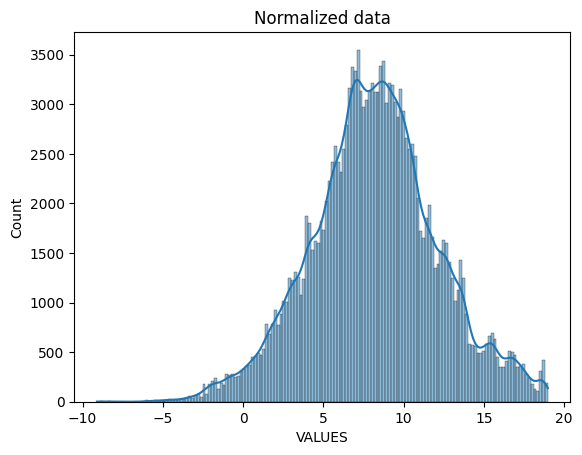

In [10]:
# plot normalized data
ax = sns.histplot(normalized_values, kde=True)
ax.set_title("Normalized data")
plt.show()

### Lesson 3: Parsing dates

**Checking the data type of dates**

In [31]:
# O = OBJECT other dtypes kind in https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind
iea_df['TIME'].dtype

dtype('O')

**Parsing dates** 
Convert the previous object type into the datetime64 type

reference for format: https://strftime.org/ 

In [28]:
iea_df['DATE'] = pd.to_datetime(iea_df['TIME'], format="%B %Y")
iea_df['DATE']

0        2010-01-01
1        2010-01-01
2        2010-01-01
3        2010-01-01
4        2010-01-01
            ...    
181910   2022-12-01
181911   2022-12-01
181912   2022-12-01
181913   2022-12-01
181914   2022-12-01
Name: DATE, Length: 181915, dtype: datetime64[ns]

In case there is **corrupted data** we can:

0. Find the indices and amount of corrupted data:
    date_lengths = df.Date.str.len()
    date_lengths.value_counts()

    indices = np.where([date_lengths == 24])[1] #replacing 24 for the length of the corrupted data

    print('Indices with corrupted data:', indices)

    df.loc[indices]

1. If there are a couple of rows with this problem, one might consider manually editing them. For instance, you can begin by setting 

    df.loc[3378, "Date"] = "02/23/1975".
    
2. Handle strings to do it automatically:

    #Replace the corrupted dates with the regular format:

    for index in indices:
    
        year= str(earthquakes.loc[index,"Date"][0:4])

        month= str(earthquakes.loc[index,"Date"][5:7])

        day= str(earthquakes.loc[index,"Date"][8:10])

        time = str(earthquakes.loc[index,"Date"][11:19])

        earthquakes.loc[index,"Date"] = month +'/'+ day+'/'+year

        earthquakes.loc[index,"Time"] = time


        earthquakes.loc[indices]

        #parse dates:
    
        earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")

When one run into an error when there are multiple date formats in a single column we can have pandas try to infer what the right date format should be with:

    df['date_parsed'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

Why don't you always use infer_datetime_format = True? 
* Pandas won't always been able to figure out the correct date format
* It's much slower than specifying the exact format of the dates.

**Select the day of the month**

In [33]:
# get the day of the month from the date_parsed column
# Can only use .dt accessor with datetimelike values
day_of_month_iea = iea_df['DATE'].dt.day
day_of_month_iea.head()

0    1
1    1
2    1
3    1
4    1
Name: DATE, dtype: int32

**Plot the day of the month to check the date parsing**

c:\workspace\Kaggle-X\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\workspace\Kaggle-X\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\workspace\Kaggle-X\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


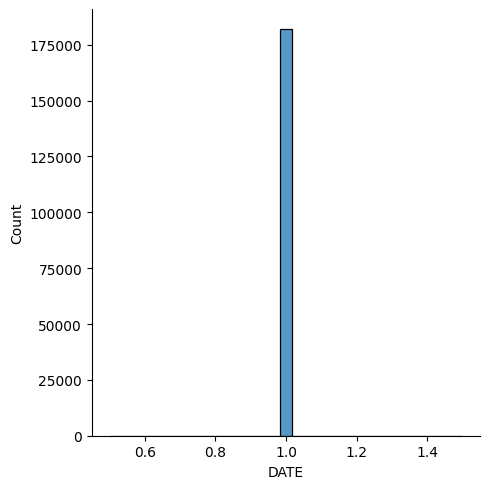

In [35]:
# remove na's
day_of_month_iea = day_of_month_iea.dropna()

# plot the day of the month
sns.displot(day_of_month_iea, kde=False, bins=31)

### Lesson 4: Character Encodings
Avoid UnicoodeDecodeErrors when loading CSV files.

**What are encodings?**
Character encodings are specific sets of rules for mapping from raw binary byte strings.

If you tried to read in text with a different encoding than the one it was originally written in, you ended up with scrambled text called "mojibake"
    æ–‡å—åŒ–ã??
or unknown characters:
    ����������

UTF-8 is the standard text encoding. All Python code is in UTF-8 and, ideally, all your data should be as well. It's when things aren't in UTF-8 that you run into trouble.

In [3]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

The other data is the bytes data type, which is a sequence of integers. You can convert a string into bytes by specifying which encoding it's in:

In [4]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors="replace")

# check the type
type(after)

bytes

In [5]:
# take a look at what the bytes look like
after

b'This is the euro symbol: \xe2\x82\xac'

In [6]:
# convert it back to utf-8
print(after.decode("utf-8"))

This is the euro symbol: €


Error trying to decode with the wrong encoding:

In [7]:
# try to decode our bytes with the ascii encoding
print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

Error #2: if we try to use the wrong encoding to map from a string to bytes. Strings are UTF-8 by default in Python 3, so if we try to treat them like they were in another encoding we'll create problems.

In [8]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(
# since any characters not in ASCII will just be replaced with the unknown character. 

This is the euro symbol: ?


**Reading in files with encoding problems**

If we try to read in a file not in UTF-8 we will find the same UnicodeDecodeError we got when we tried to decode UTF-8 bytes as if they were ASCII! because this is what Python expects by default

In [9]:
# look at the first ten thousand bytes to guess the character encoding
with open("C:\workspace\Kaggle-X\datasets\iea-monthly-electricity-statistics.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}


In [16]:
# read in the file with the encoding detected by charset_normalizer
df = pd.read_csv("C:\workspace\Kaggle-X\datasets\iea-monthly-electricity-statistics.csv", encoding='utf8')

# look at the first few lines
df.head()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,NaN,0.930108


**Saving your files with UTF-8 encoding**

In [17]:
# save our file (will be saved as UTF-8 by default!)
df.to_csv("iea-utf8.csv")

In [18]:
# look at the first ten thousand bytes to guess the character encoding
with open("C:\workspace\Kaggle-X\Learning\iea-utf8.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}


### Lesson 5: Inconsistent Data Entry
Efficiently fix typos in your data.

**Do some preliminary text pre-processing**

First we can get a look into one of the columns to search for inconsistencies like repeated data

In [20]:
# get all the unique values in the 'Country' column
countries = iea_df['COUNTRY'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'IEA Total', 'Iceland',
       'India', 'Ireland', 'Italy', 'Japan', 'Korea', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Mexico', 'Netherlands',
       'New Zealand', 'North Macedonia', 'Norway', 'OECD Americas',
       'OECD Asia Oceania', 'OECD Europe', 'OECD Total', 'Poland',
       'Portugal', 'Republic of Turkiye', 'Romania', 'Serbia',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom', 'United States'], dtype=object)

If we had some inconsistencies we could do:

* make everything lower case (I can change it back at the end if I like) and 
* remove any white spaces at the beginning and end of cells. 

Inconsistencies in capitalizations and trailing white spaces are very common in text data and you can fix a good 80% of your text data entry inconsistencies by doing this.

In [ ]:
# convert to lower case
#iea_df['COUNTRY'] = iea_df['COUNTRY'].str.lower()
# remove trailing white spaces
#iea_df['COUNTRY'] = iea_df['COUNTRY'].str.strip()

**Use fuzzy matching to correct inconsistent data entry**

We can use the fuzzywuzzy package to help identify which strings are closest to each other in case there is inconsistent data like: 'southkorea' and 'south korea' in the same country column.

**Fuzzy matching:** The process of automatically finding text strings that are very similar to the target string. In general, a string is considered "closer" to another one the fewer characters you'd need to change if you were transforming one string into another. So "apple" and "snapple" are two changes away from each other

Fuzzywuzzy returns a ratio given two strings. The closer the ratio is to 100, the smaller the edit distance between the two strings. Here, we're going to get the ten strings from our list of cities that have the closest distance to "south korea".

In [21]:
# get the top 10 closest matches to "south korea"
matches = fuzzywuzzy.process.extract("Colombia", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('Colombia', 100),
 ('Croatia', 53),
 ('Romania', 53),
 ('Slovenia', 50),
 ('Costa Rica', 44),
 ('Latvia', 43),
 ('Poland', 43),
 ('Serbia', 43),
 ('Estonia', 40),
 ('Iceland', 40)]

If there were two of the items in the cities that were very close to "Colombia" like "Colom bia" and "Colombia" we could replace all rows in our "Country" column that have a ratio of greater than the values of that data with "Colombia".

***General function for replacing inconsistent data***

In [ ]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 60):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [ ]:
# use the function we just wrote to replace close matches to "south korea" with "south korea"
replace_matches_in_column(df=iea_df, column='COUNTRY', string_to_match="Colombia")

And check again that there are not inconsistent data anymore

In [ ]:
# get all the unique values in the 'Country' column
countries = iea_df['COUNTRY'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries